In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import os
# os.chdir("C:\\Users\\MANDY\\Desktop\\dataset\\bank")

In [81]:
train=pd.read_csv("/content/drive/My Drive/bank dataset.csv")
# df=pd.read_csv("bank dataset.csv")

In [5]:
train.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [6]:
train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
train.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


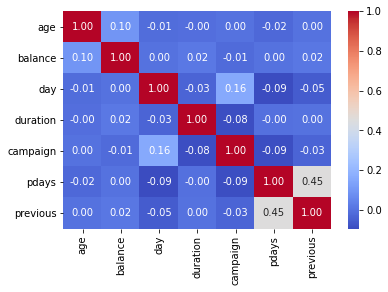

In [8]:
sns.heatmap(train.corr(),annot=True,fmt="0.2f",cmap="coolwarm")
plt.show()

* as u can see above this corelation matrix shows that this data set has no perfect corellation , so now we will go for classifaction , latter we will discuss we will go for which classification method and why ?

In [9]:
train.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Text(0.5, 1.0, 'age distribution of employee')

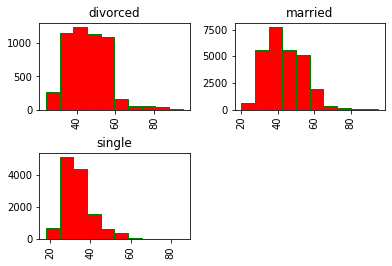

In [11]:
train.hist(column='age',
           by='marital' ,figsize=(6,4),color = "red",
          edgecolor = "green") 
plt.xlabel('age of employee')
plt.ylabel('martial status of employee')
plt.title('age distribution of employee')

* this histogram shows that most people who are 'single' are between 25 to 36 and theor no is around(1000)
* Another histogram shows that most people who are from married are from 25 to 60 and most people are from age of 40 ant their no is 5000 to 7500
* again, this histogram  shows that most divorced people are from 25 to 60 as previous^ line shows that total no is 1000

Text(0.5, 1.0, 'age vs education')

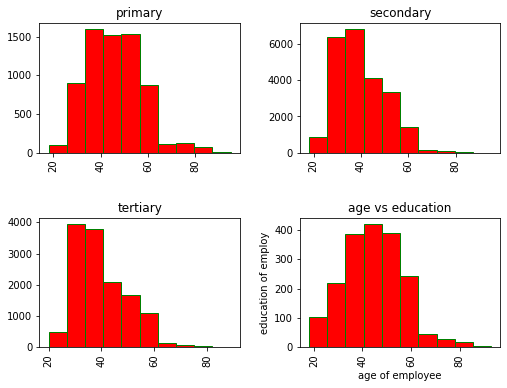

In [12]:
train.hist(column='age',
           by='education' ,figsize=(8,6),color = "red",
          edgecolor = "green") 
plt.xlabel('age of employee')
plt.ylabel('education of employ')
plt.title('age vs education')

Text(0.5, 1.0, 'in which age theyget house')

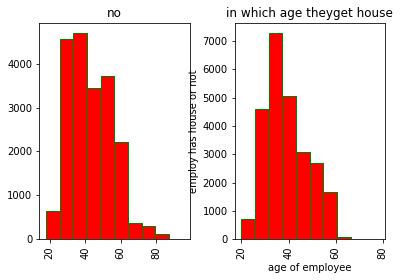

In [13]:
train.hist(column='age',
           by='housing' ,figsize=(6,4),color = "red",
          edgecolor = "green") 
plt.xlabel('age of employee')
plt.ylabel('employ has house or not')
plt.title('in which age theyget house')

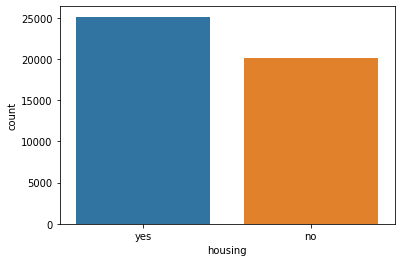

In [14]:
sns.countplot(x='housing',data=train)

Text(0.5, 1.0, 'age vs emp variation rate')

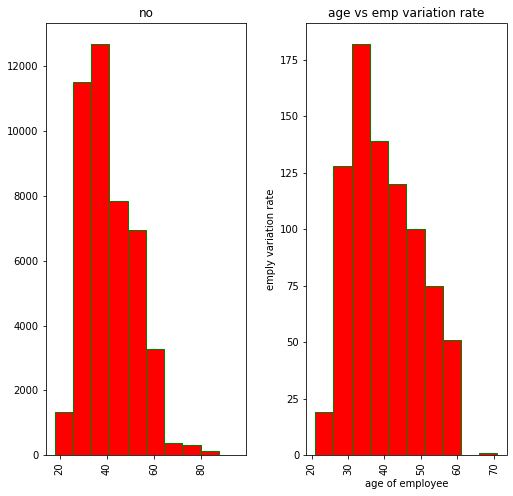

In [15]:
train.hist(column='age',
           by='default' ,figsize=(8,8),color = "red",
          edgecolor = "green") 
plt.xlabel('age of employee')
plt.ylabel('emply variation rate')
plt.title('age vs emp variation rate')

Text(0.5, 1.0, 'day of week')

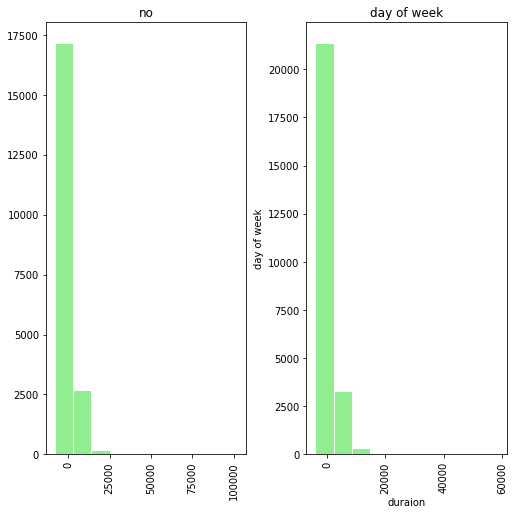

In [16]:
train.hist(column='balance',
           by='housing' ,figsize=(8,8),color = "lightgreen",
          edgecolor = "white") 
plt.xlabel('duraion')
plt.ylabel('day of week')
plt.title('day of week')

In [17]:
train.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

Text(0.5, 1.0, 'day of week')

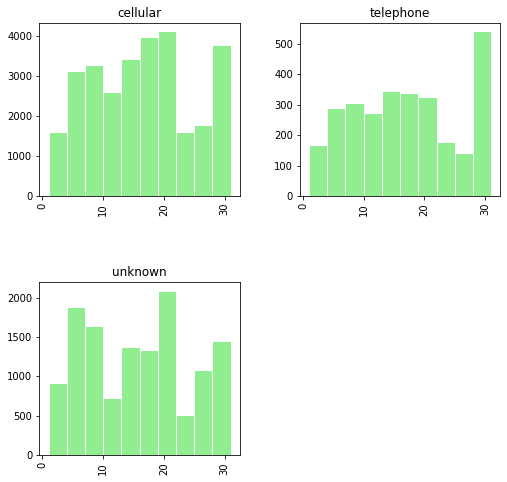

In [18]:
train.hist(column='day',
           by='contact' ,figsize=(8,8),color = "lightgreen",
          edgecolor = "white") 
plt.xlabel('duraion')
plt.ylabel('day of week')
plt.title('day of week')

Text(0.5, 1.0, 'day of week')

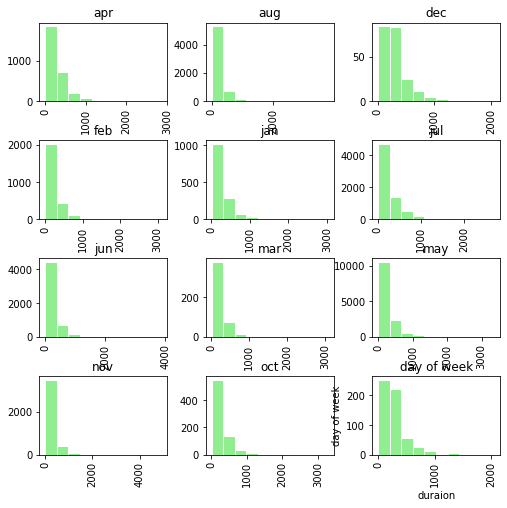

In [19]:
train.hist(column='duration',
           by='month' ,figsize=(8,8),color = "lightgreen",
          edgecolor = "white") 
plt.xlabel('duraion')
plt.ylabel('day of week')
plt.title('day of week')

Text(0.5, 1.0, 'day of week')

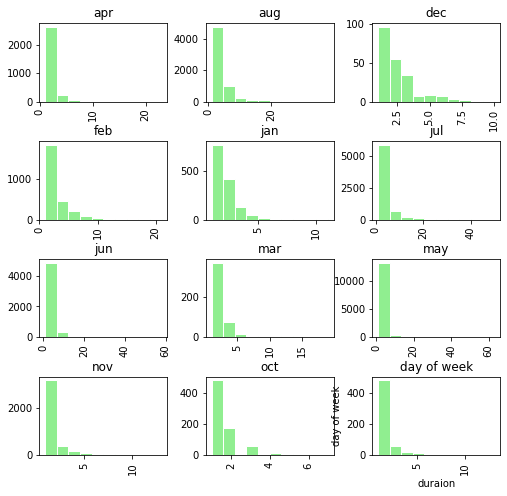

In [20]:
train.hist(column='campaign',
           by='month' ,figsize=(8,8),color = "lightgreen",
          edgecolor = "white") 
plt.xlabel('duraion')
plt.ylabel('day of week')
plt.title('day of week')

Text(0.5, 1.0, 'day of week')

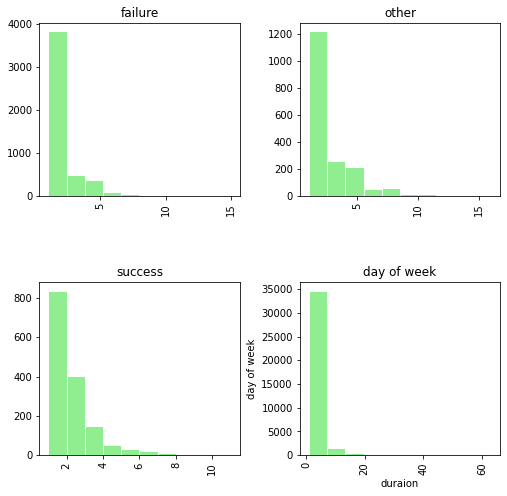

In [21]:
train.hist(column='campaign',
           by='poutcome' ,figsize=(8,8),color = "lightgreen",
          edgecolor = "white") 
plt.xlabel('duraion')
plt.ylabel('day of week')
plt.title('day of week')

Text(0.5, 1.0, 'day of week')

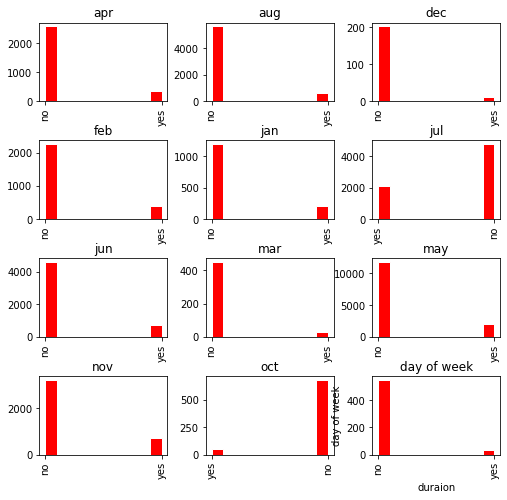

In [22]:
train.hist(column='loan',
           by='month' ,figsize=(8,8),color = "red",
          edgecolor = "white") 
plt.xlabel('duraion')
plt.ylabel('day of week')
plt.title('day of week')

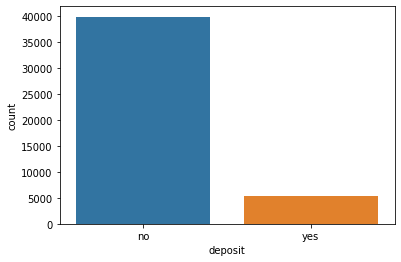

In [23]:

# Countplot variable 'deposit'
sns.countplot(x='deposit',data=train)

Why bank has to set a marketing campaign
Above plot shows that most of the people are not going to give the deposit ,out of 45111 only 4511 are giving the deposit means approx 10% people are giving their deposit , so bank has to set a market campaign later i will explain why people are not able to submit the deposit

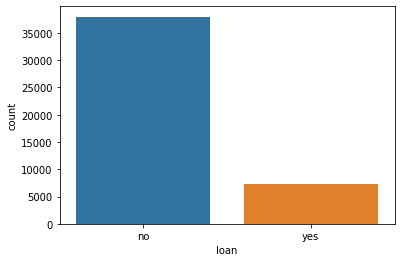

In [24]:
# Countplot variable 'deposit'
sns.countplot(x='loan',data=train)

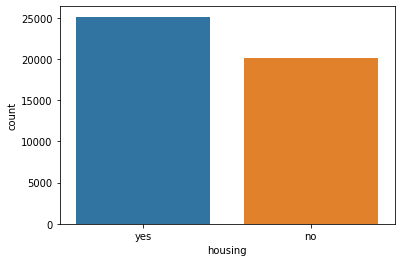

In [25]:
# Countplot variable 'deposit'
sns.countplot(x='housing',data=train)

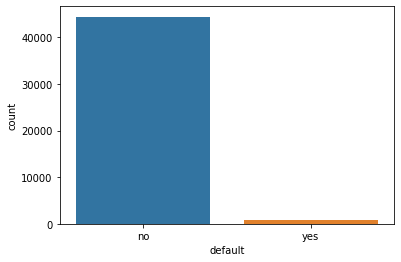

In [26]:
# Countplot variable 'deposit'
sns.countplot(x='default',data=train)

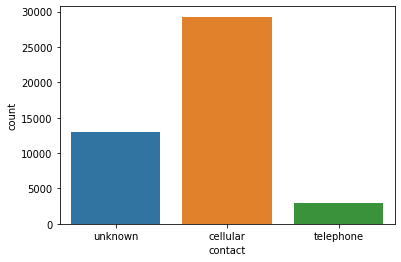

In [27]:
# Countplot variable 'deposit'
sns.countplot(x='contact',data=train)

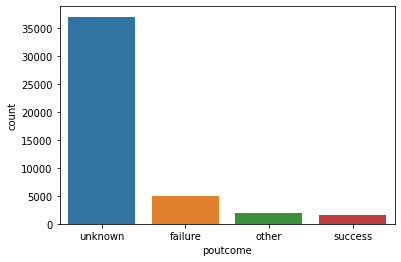

In [28]:
# Countplot variable 'deposit'
sns.countplot(x='poutcome',data=train)

In [29]:
train['duration'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [30]:
# Contingency Table
data_crosstab = pd.crosstab(train['duration'], 
                            train['deposit'],  
                               margins = True) 
data_crosstab.transpose()

duration,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2201,2219,2231,2241,2256,2260,2301,2330,2372,2389,2420,2429,2453,2456,2462,2485,2516,2621,2635,2653,2692,2769,2770,2775,2870,3025,3076,3078,3094,3102,3183,3253,3284,3322,3366,3422,3785,3881,4918,All
deposit,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
no,3,2,3,4,15,35,45,73,84,77,76,96,80,88,84,85,88,81,94,71,83,79,87,76,80,78,70,71,55,80,62,57,54,57,72,66,90,77,62,75,...,1,1,0,1,1,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,1,1,1,0,1,39922
yes,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0,1,1,0,1,1,1,1,1,0,0,1,0,1,1,1,1,0,0,0,0,0,1,0,5289
All,3,2,3,4,15,35,45,73,85,77,76,97,80,88,84,85,88,81,94,71,83,79,87,77,80,79,70,71,55,80,63,57,54,57,73,66,90,77,62,76,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,45211


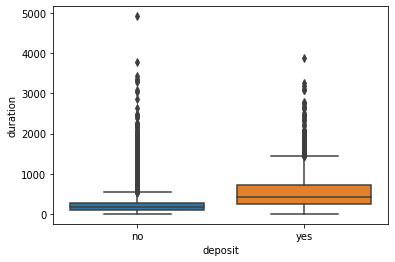

In [31]:
sns.boxplot(x='deposit', y='duration', data=train)

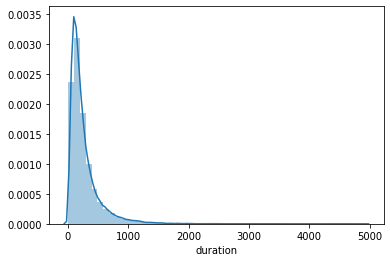

In [32]:
sns.distplot(train['duration'])

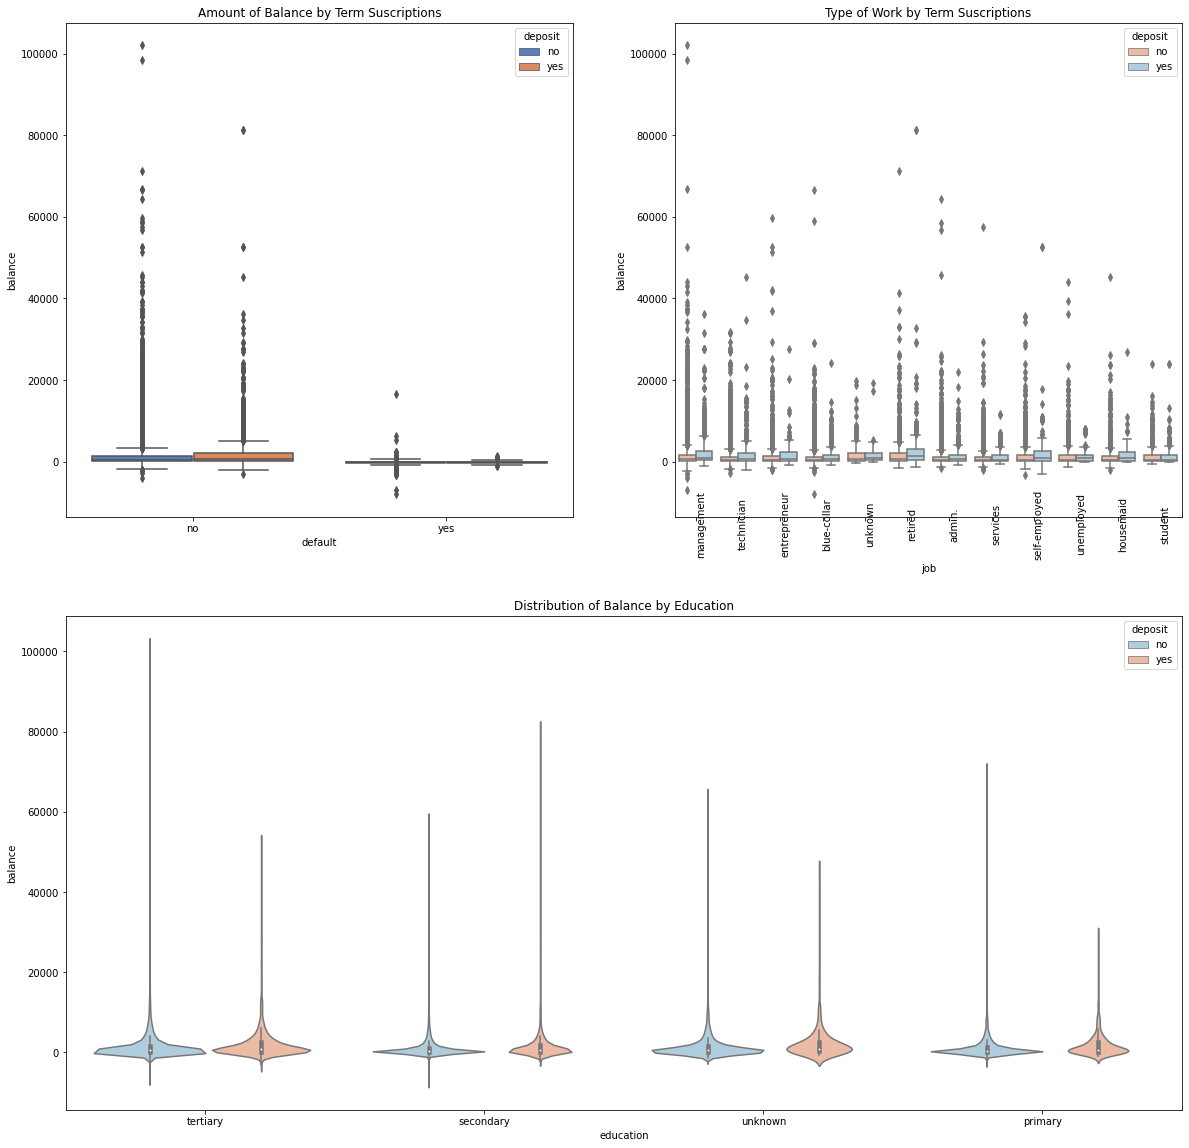

In [33]:
# plt.style.use('dark_background')
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

g = sns.boxplot(x="default", y="balance", hue="deposit",
                    data=train, palette="muted", ax=ax1)

g.set_title("Amount of Balance by Term Suscriptions")

# ax.set_xticklabels(df["default"].unique(), rotation=45, rotation_mode="anchor")

g1 = sns.boxplot(x="job", y="balance", hue="deposit",
                 data=train, palette="RdBu", ax=ax2)

g1.set_xticklabels(train["job"].unique(), rotation=90, rotation_mode="anchor")
g1.set_title("Type of Work by Term Suscriptions")

g2 = sns.violinplot(data=train, x="education", y="balance", hue="deposit", palette="RdBu_r")
g2.set_title("Distribution of Balance by Education")


plt.show()

In [34]:
### Why our dataset is imbalanced?
#### becuase 

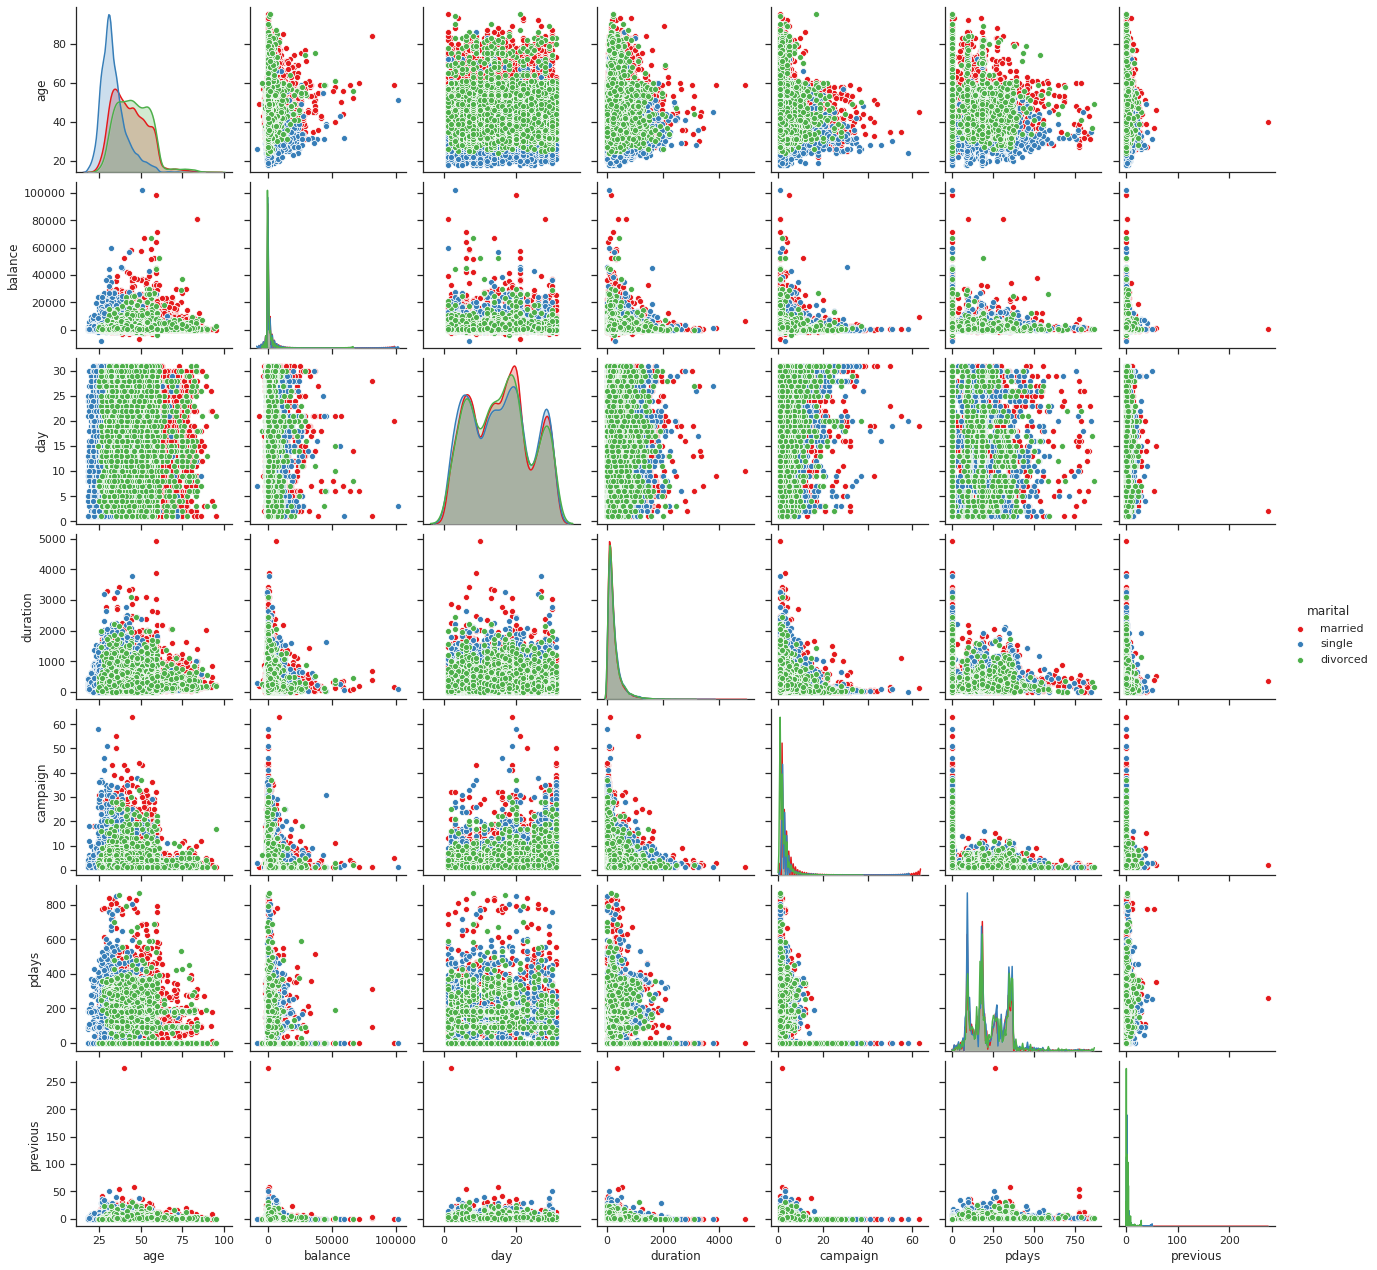

In [35]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(train, hue="marital", palette="Set1")
plt.show()

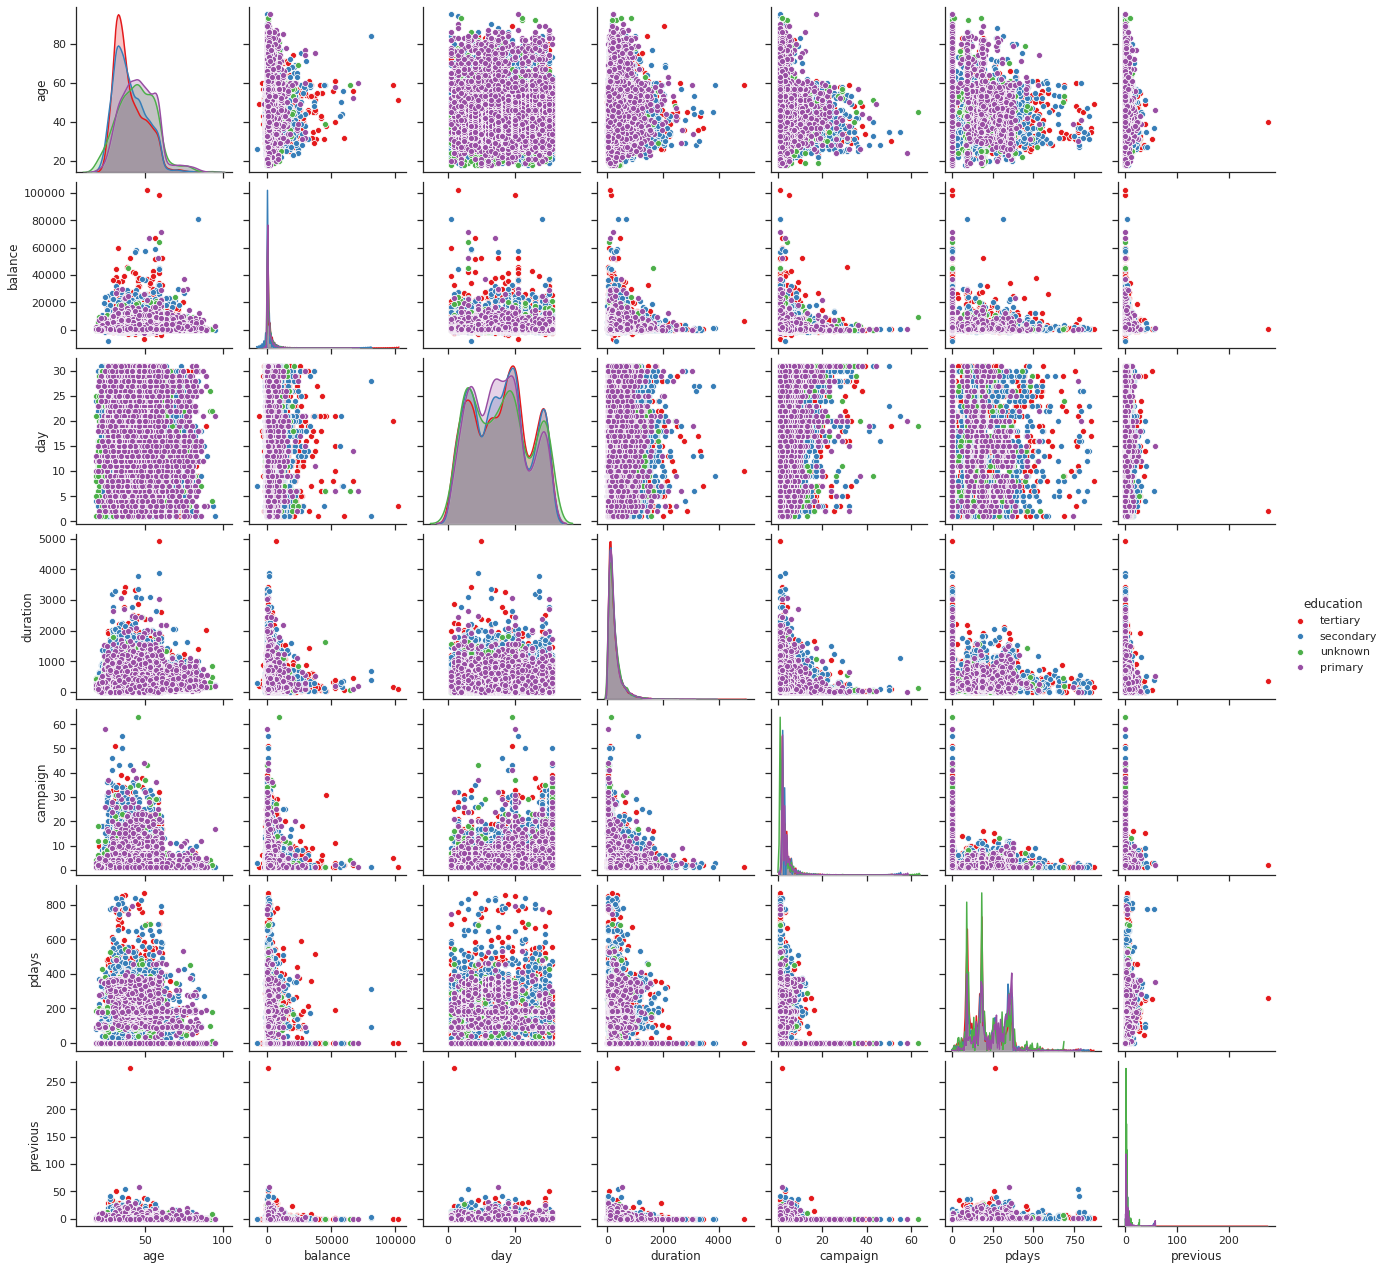

In [36]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(train, hue="education", palette="Set1")
plt.show()

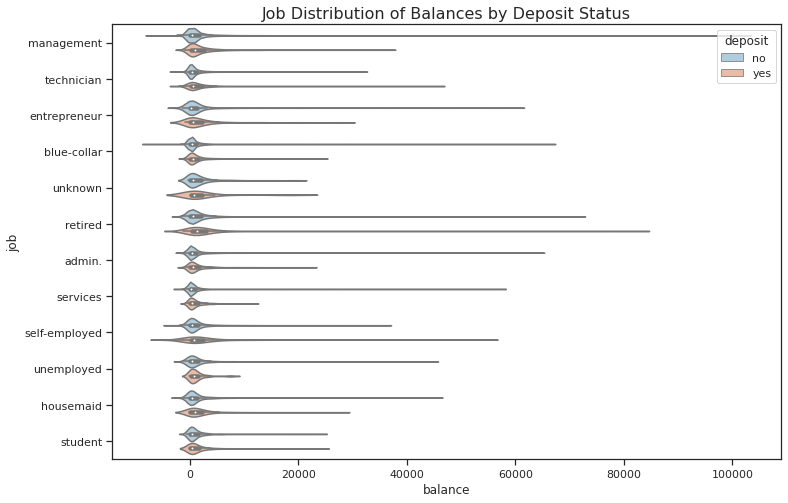

In [37]:
fig = plt.figure(figsize=(12,8))

sns.violinplot(x="balance", y="job", hue="deposit", palette="RdBu_r",
            data=train);

plt.title("Job Distribution of Balances by Deposit Status", fontsize=16)

plt.show()

### Campaign Duration: 

* Campaign Duration: we see that duration has a high correlation with term deposits meaning the higher the duration, the more likely it is for a client to open a term deposit. 
* Average Campaign Duration: The average campaign duration is 374.76, let's see if clients that were above this average were more likely to open a term deposit. 
* Duration Status: People who were above the duration status, were more likely to open a term deposit. 78% of the group that is above average in duration opened term deposits while those that were below average 32% opened term deposit accounts. This tells us that it will be a good idea to target individuals who are in the above average category

###  null value check

In [38]:
train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

* conclusion- as you  can see here is not any null value

* What is a Term Deposit?
* => A Term deposit is a deposit that a bank or a financial institurion offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time. For more information with regards to Term Deposits please click on this link from Investopedia

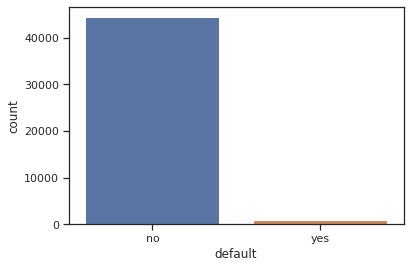

In [39]:
# Countplot variable 'deposit'
sns.countplot(x='default',data=train)

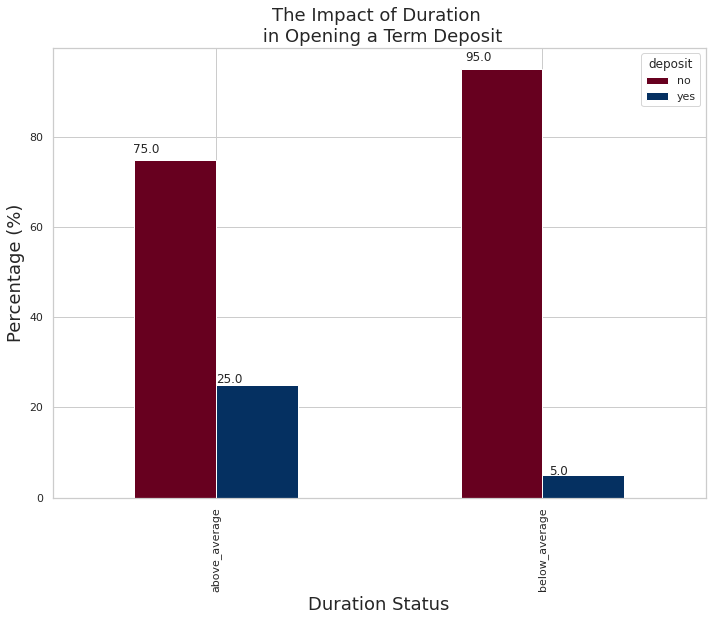

In [40]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
avg_duration = train['duration'].mean()

lst = [train]
train["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"
    
pct_term = pd.crosstab(train['duration_status'], train['deposit']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=18)
plt.xlabel("Duration Status", fontsize=18);
plt.ylabel("Percentage (%)", fontsize=18)
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() * 1.02, i.get_height() * 1.02))
    

plt.show()

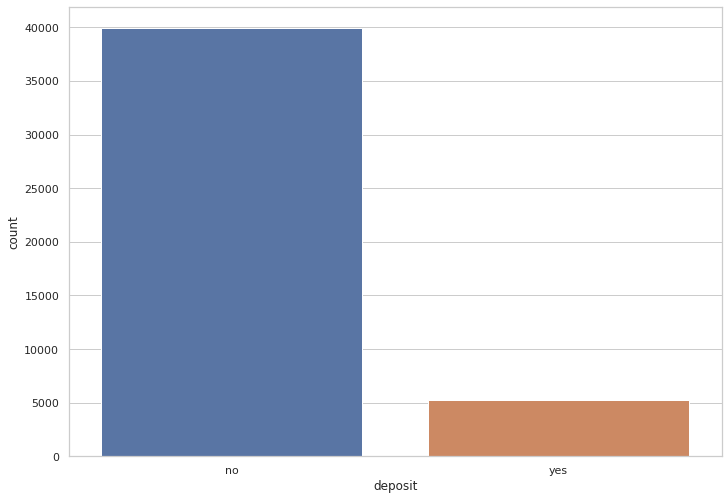

In [41]:

# Countplot variable 'deposit'
sns.countplot(x='deposit',data=train)

In [42]:
train.dtypes

age                 int64
job                object
marital            object
education          object
default            object
balance             int64
housing            object
loan               object
contact            object
day                 int64
month              object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
deposit            object
duration_status    object
dtype: object

# classifacation model

# Preprocessing For Model prepratio

In [82]:
# limit to categorical data using df.select_dtypes()
X = train.select_dtypes(include=[object])
X.head(3)

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no


In [83]:
X.shape

(45211, 10)

In [84]:
# import preprocessing from sklearn
from sklearn import preprocessing

In [85]:
X.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [86]:
# TODO: create a LabelEncoder object and fit it to each feature in X


# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply
# 2. FIT le.fit_transform to all columns
transform = train.apply(le.fit_transform)
transform.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0


In [87]:
#  TODO: create a OneHotEncoder object, and fit it to all of X

# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(transform)

# 3. Transform
onehotlabels = enc.transform(transform).toarray()
onehotlabels.shape

# as you can see, you've the same number of rows 891
# but now you've so many more columns due to how we changed all the categorical data into numerical data

(45211, 9543)

In [88]:
onehotlabels

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [89]:

type(onehotlabels)

numpy.ndarray

In [90]:
transform.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0


In [91]:
transform.drop(['default'],axis=1)
transform.drop(['month'],axis=1)

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,deposit
0,40,4,1,2,0,3036,1,0,2,4,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,198,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,2,0,1741,0,0,0,16,975,2,0,0,3,1
45207,53,5,0,0,0,2639,0,0,0,16,456,1,0,0,3,1
45208,54,5,1,1,0,5455,0,0,0,16,1116,4,181,3,2,1
45209,39,1,1,1,0,1584,0,0,1,16,508,3,0,0,3,0


In [92]:
from sklearn import preprocessing
X = preprocessing.scale(transform)

In [93]:
#seperating independent and dependent variables
y = transform['deposit']
X = transform.drop(['deposit'], axis=1)

In [55]:
transform.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit', 'duration_status'],
      dtype='object')

In [94]:
featurecolumns = transform.columns.difference(['default'])
featurecolumns

Index(['age', 'balance', 'campaign', 'contact', 'day', 'deposit', 'duration',
       'education', 'housing', 'job', 'loan', 'marital', 'month', 'pdays',
       'poutcome', 'previous'],
      dtype='object')

In [95]:
#importing train_test_split to create validation set
from sklearn.model_selection import train_test_split

In [96]:
data = transform.copy()

In [97]:
#creating the train and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1000, stratify=transform['deposit'], test_size=0.20)

In [98]:
# distribution in training set
y_train.value_counts(normalize=True)

0    0.883018
1    0.116982
Name: deposit, dtype: float64

In [99]:
#shape of training set
X_train.shape, y_train.shape

((36168, 16), (36168,))

In [100]:
#shape of validation set
X_test.shape, y_test.shape

((9043, 16), (9043,))

In [101]:
#for machine learning

import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [102]:
round(y_train.value_counts()/y_train.shape[0] * 100,3)

0    88.302
1    11.698
Name: deposit, dtype: float64

In [103]:
## Model Building

logreg = LogisticRegression(random_state=0, class_weight='balanced')
logreg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [104]:
#Features and their coefficients

coefficient_df =  pd.DataFrame({'Features' : pd.Series(featurecolumns),
                        "Coefficients" : pd.Series(logreg.coef_[0])})


In [105]:
logreg.intercept_

array([-0.09640449])

## Model Performance

#### Metrics

- Recall: Ratio of the total number of correctly classified positive examples divide to the total number of positive examples. High Recall indicates the class is correctly recognized
- Precision: To get the value of precision we divide the total number of correctly classified positive examples by the total number of predicted positive examples. High Precision indicates an example labeled as positive is indeed positive

In [106]:
#Predicting the test cases
bankloans_test_pred_log = pd.DataFrame({'actual':y_test, 'predicted': logreg.predict(X_test)})
bankloans_test_pred_log = bankloans_test_pred_log.reset_index()
bankloans_test_pred_log.head()

,index,actual,predicted
0,28665,0,0
1,16989,0,0
2,2548,0,0
3,11721,0,0
4,38943,0,0


In [107]:
#creating a confusion matrix
cm_logreg = metrics.confusion_matrix(bankloans_test_pred_log.actual,
                                    bankloans_test_pred_log.predicted,labels = [1,0])
cm_logreg

array([[ 783,  275],
       [1642, 6343]])

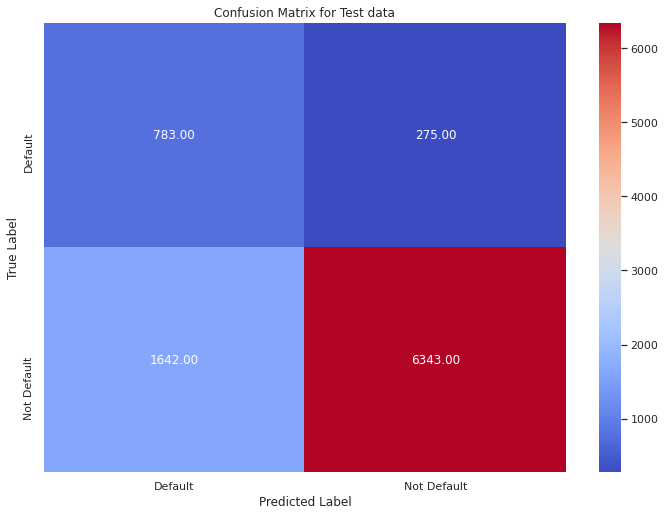

In [108]:
sns.heatmap(cm_logreg,annot=True ,fmt=".2f", cmap="coolwarm",
            xticklabels = ["Default", "Not Default"] , yticklabels = ["Default", "Not Default"])
plt.title("Confusion Matrix for Test data")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [109]:
#find precision score
prec_score = metrics.precision_score(bankloans_test_pred_log.actual, bankloans_test_pred_log.predicted)
print("Precision score :", round(prec_score,3))

Precision score : 0.323


In [110]:
#find the overall accuracy of model

acc_score = metrics.accuracy_score(bankloans_test_pred_log.actual,bankloans_test_pred_log.predicted)
print("Accuracy of model :", round(acc_score,3))

Accuracy of model : 0.788


In [111]:
bankloans_test_pred_log.actual.value_counts()

0    7985
1    1058
Name: actual, dtype: int64

In [112]:
print(metrics.classification_report(bankloans_test_pred_log.actual, bankloans_test_pred_log.predicted))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87      7985
           1       0.32      0.74      0.45      1058

    accuracy                           0.79      9043
   macro avg       0.64      0.77      0.66      9043
weighted avg       0.88      0.79      0.82      9043



## gridsearch cv

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best parameters : {'class_weight': {0: 0.19210526315789472, 1: 0.8078947368421052}}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


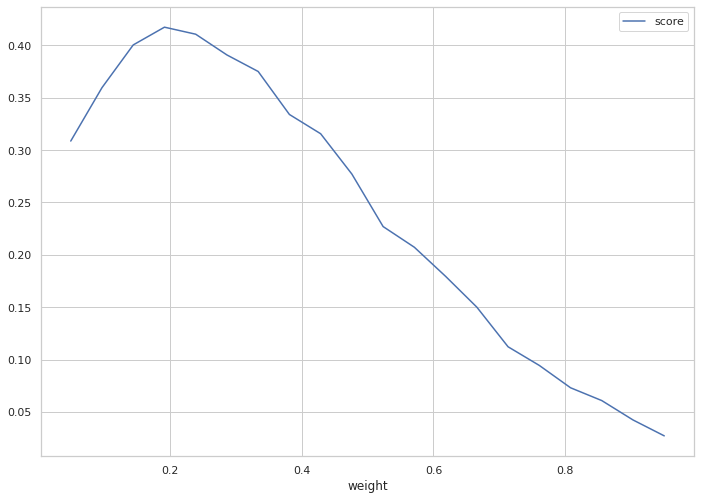

In [114]:
from sklearn.model_selection import GridSearchCV

weights = np.linspace(0.05, 0.95, 20)

gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    cv=3
)
grid_result = gsc.fit(X, y)

print("Best parameters : %s" % grid_result.best_params_)

# Plot the weights vs f1 score
dataz = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                       'weight': weights })
dataz.plot(x='weight')

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      7985
           1       0.37      0.56      0.45      1058

    accuracy                           0.84      9043
   macro avg       0.66      0.72      0.68      9043
weighted avg       0.87      0.84      0.85      9043



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(<Figure size 842.4x595.44 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd058014be0>)

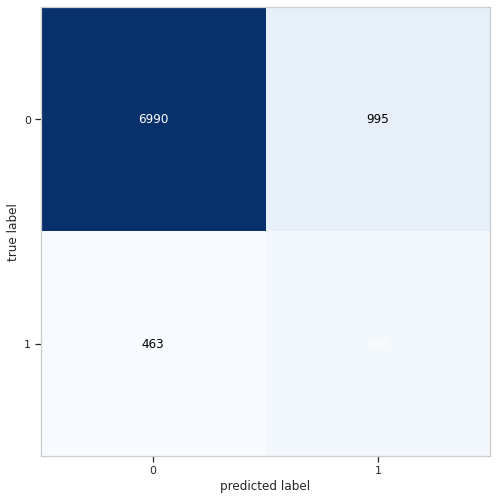

In [115]:
from sklearn.metrics import confusion_matrix, classification_report
lr = LogisticRegression(**grid_result.best_params_)

# Fit..
lr.fit(X_train, y_train)

# Predict..
y_pred = lr.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

# Smote

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.95      0.81      0.87      7985
           1       0.32      0.70      0.44      1058

    accuracy                           0.79      9043
   macro avg       0.64      0.75      0.66      9043
weighted avg       0.88      0.79      0.82      9043



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(<Figure size 842.4x595.44 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd05acf4860>)

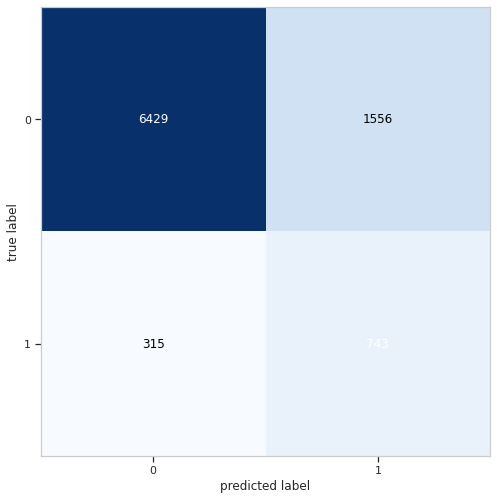

In [116]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

pipe = make_pipeline(
    SMOTE(),
    LogisticRegression()
)

# Fit..
pipe.fit(X_train, y_train)

# Predict..
y_pred = pipe.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

### Conclusion
Overall test accuracy is 88%. But it is not a good measure. There are lot of cases which are default and the model has predicted them as not going to submit the term deposit. The objective of the model is to identify the customers who will default, so that the bank can intervene and act.This might be the case as the default model assumes people with more than 0.5 probability will not default. 

In [118]:
#probabilty of prediction

predict_prob_df = pd.DataFrame(logreg.predict_proba(X_test))
predict_prob_df.head()

,0,1
0,0.505765,0.494235
1,0.790053,0.209947
2,0.574749,0.425251
3,0.845592,0.154408
4,0.545443,0.454557


In [119]:
bankloans_test_pred_log = pd.concat([bankloans_test_pred_log, predict_prob_df], axis = 1)
bankloans_test_pred_log.columns = ['index', 'actual', 'predicted', 'default_0','default_1']

bankloans_test_pred_log.head()

,index,actual,predicted,default_0,default_1
0,28665,0,0,0.505765,0.494235
1,16989,0,0,0.790053,0.209947
2,2548,0,0,0.574749,0.425251
3,11721,0,0,0.845592,0.154408
4,38943,0,0,0.545443,0.454557


In [120]:
#find the auc score

auc_score = metrics.roc_auc_score(bankloans_test_pred_log.actual, bankloans_test_pred_log.default_1)
round(auc_score,4)

0.8487

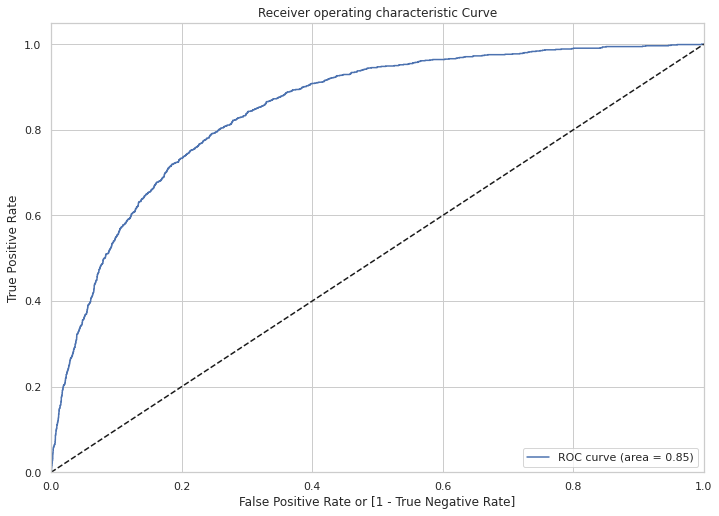

In [121]:
#Draw a roc curve

fpr, tpr, thresholds = metrics.roc_curve(bankloans_test_pred_log.actual, bankloans_test_pred_log.default_1, 
                                         drop_intermediate= False)


plt.plot(fpr, tpr , label = 'ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Curve')
plt.legend(loc="lower right")
plt.show()

In [122]:
##TPR - Sensitivity
##1-FPR - Specificity

i = np.arange(len(tpr))

roc_like_df = pd.DataFrame({'falsepositiverate' : pd.Series(fpr, index=i),'sensitivity' : pd.Series(tpr, index = i), 
              'specificity' : pd.Series(1-fpr, index = i),'cutoff' : pd.Series(thresholds, index = i)})
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

,falsepositiverate,sensitivity,specificity,cutoff,total
2802,0.246086,0.791115,0.753914,0.454239,1.545029


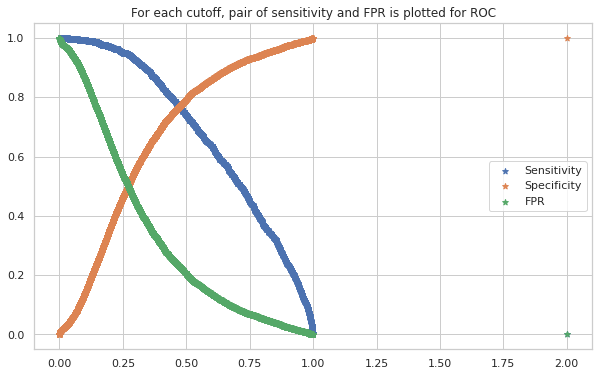

In [123]:
plt.subplots(figsize=(10,6))
plt.scatter(roc_like_df['cutoff'], roc_like_df['sensitivity'], marker='*', label='Sensitivity')
plt.scatter(roc_like_df['cutoff'], roc_like_df['specificity'], marker='*', label='Specificity')
plt.scatter(roc_like_df['cutoff'], roc_like_df['falsepositiverate'], marker='*', label='FPR')
plt.title('For each cutoff, pair of sensitivity and FPR is plotted for ROC')
plt.legend()

plt.show()

In [124]:
#Predicting with new cut-off probability
bankloans_test_pred_log['new_labels'] = bankloans_test_pred_log['default_1'].map( lambda x: 1 if x >= 0.224326 else 0 )

bankloans_test_pred_log.head()

,index,actual,predicted,default_0,default_1,new_labels
0,28665,0,0,0.505765,0.494235,1
1,16989,0,0,0.790053,0.209947,0
2,2548,0,0,0.574749,0.425251,1
3,11721,0,0,0.845592,0.154408,0
4,38943,0,0,0.545443,0.454557,1


In [125]:
#creating a confusion matrix

cm_logreg = metrics.confusion_matrix(bankloans_test_pred_log.actual,
                                    bankloans_test_pred_log.new_labels,labels = [1,0])
cm_logreg

array([[1020,   38],
       [4706, 3279]])

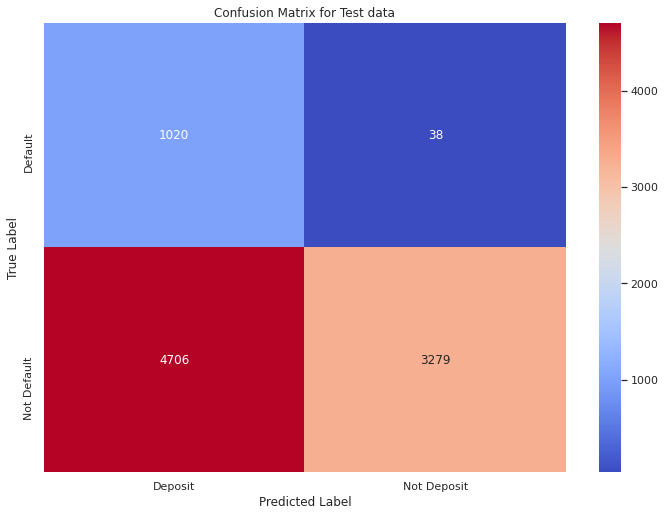

In [127]:
sns.heatmap(cm_logreg,annot=True, fmt="d", cmap="coolwarm",
            xticklabels = ["Deposit", "Not Deposit"] , yticklabels = ["Default", "Not Default"])
plt.title("Confusion Matrix for Test data")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [128]:
#classification report 

print(metrics.classification_report(bankloans_test_pred_log.actual,bankloans_test_pred_log.new_labels))

              precision    recall  f1-score   support

           0       0.99      0.41      0.58      7985
           1       0.18      0.96      0.30      1058

    accuracy                           0.48      9043
   macro avg       0.58      0.69      0.44      9043
weighted avg       0.89      0.48      0.55      9043



In [129]:
#intuitively the ability of the classifier to find all the positive samples

recall_score = metrics.recall_score(bankloans_test_pred_log.actual, bankloans_test_pred_log.new_labels)
print("recall_score:", round(recall_score , 2))

recall_score: 0.96


In [130]:
#find precision score
prec_score = metrics.precision_score(bankloans_test_pred_log.actual, bankloans_test_pred_log.predicted)
print("Precision score :", round(prec_score,3))

Precision score : 0.323


In [131]:
#find the overall accuracy of model

acc_score = metrics.accuracy_score(bankloans_test_pred_log.actual,bankloans_test_pred_log.new_labels)
print("Accuracy of model :", round(acc_score,3))

Accuracy of model : 0.475


### Decision Tree

In [132]:
#importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

In [133]:
#creating the decision tree function
dt_model = DecisionTreeClassifier(random_state=100)#fitting the model
# dt_model.fit(X_train, y_train))

In [134]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [135]:
#checking the training score
dt_model.score(X_train, y_train)

1.0

In [136]:
#checking the validation score
dt_model.score(X_test, y_test)

0.8748203029967931

In [137]:
#predictions on validation set
dt_model.predict(X_test)
dt_model.predict_proba(X_test)
y_pred = dt_model.predict_proba(X_test)[:,1]


y_new = []
for i in range(len(y_pred)):
    if y_pred[i]<=0.7:
        y_new.append(0)
    else:
        y_new.append(1)
        

In [138]:
from sklearn.metrics import accuracy_score

In [139]:
accuracy_score(y_test, y_new)

0.8748203029967931

In [140]:
dt_model = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

In [141]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=25,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [142]:
#Training score
dt_model.score(X_train, y_train)

0.9010727715107277

In [143]:
#Validation score
dt_model.score(X_test, y_test)

0.9018024991706293

### F1 = 2 * (precision * recall) / (precision + recall)

In [144]:
from sklearn.metrics import f1_score
# predict
y_pred = dt_model.predict(X_test)
# f1 score
score = f1_score(y_pred, y_test)

# print
print ("Decision Tree F1 score: {:.2f}".format(score))

Decision Tree F1 score: 0.50


## Checking the depth of the tree

In [145]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_test, y_test))

In [146]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.883018,0.883003
1,2,0.889239,0.890191
2,3,0.890981,0.893066
3,4,0.892446,0.893619
4,5,0.900630,0.900807


### Random Forest


In [147]:
#####
#Random Forest 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)
rfpred = rf.predict(X_test)

In [148]:
conrf = print(metrics.confusion_matrix(y_test, rfpred))
accrf = print(round(metrics.accuracy_score(y_test, rfpred), 4)*100)

[[7785  200]
 [ 622  436]]
90.91


In [149]:
from sklearn.metrics import f1_score
# predict
y_pred = rf.predict(X_test)
# f1 score
score = f1_score(y_pred, y_test)

# print
print ("Random forest F1 score: {:.2f}".format(score))

Random forest F1 score: 0.51


In [154]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7785  200]
 [ 622  436]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7985
           1       0.69      0.41      0.51      1058

    accuracy                           0.91      9043
   macro avg       0.81      0.69      0.73      9043
weighted avg       0.90      0.91      0.90      9043



In [150]:
probrf = rf.predict_proba(X_test)
predsrf = probrf[:,1]
fprrf, tprrf, thresholdrf = metrics.roc_curve(y_test, predsrf)
roc_aucrf = metrics.auc(fprrf, tprrf)

In [155]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7785  200]
 [ 622  436]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7985
           1       0.69      0.41      0.51      1058

    accuracy                           0.91      9043
   macro avg       0.81      0.69      0.73      9043
weighted avg       0.90      0.91      0.90      9043



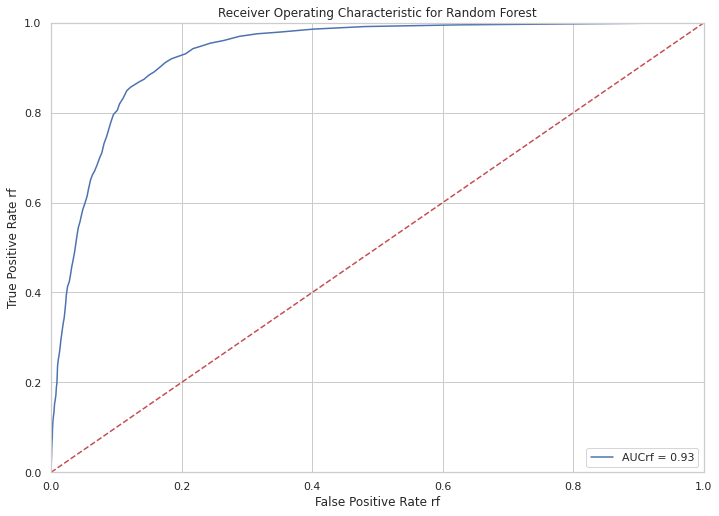

In [151]:
plt.title('Receiver Operating Characteristic for Random Forest')
plt.plot(fprrf, tprrf, 'b', label = 'AUCrf = %0.2f' % roc_aucrf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate rf')
plt.xlabel('False Positive Rate rf')
plt.show()

### xgboostClassifier

In [152]:
#########
##XGBoost
# from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost.xgbclassifier import XGBClassifier
xgb = GradientBoostingClassifier()
xgb.fit(X_train, y_train)
xgbpred = xgb.predict(X_test)
conxgb = print(metrics.confusion_matrix(y_test, xgbpred))
accxgb = print(round(metrics.accuracy_score(y_test, xgbpred), 4)*100)

[[7788  197]
 [ 646  412]]
90.68


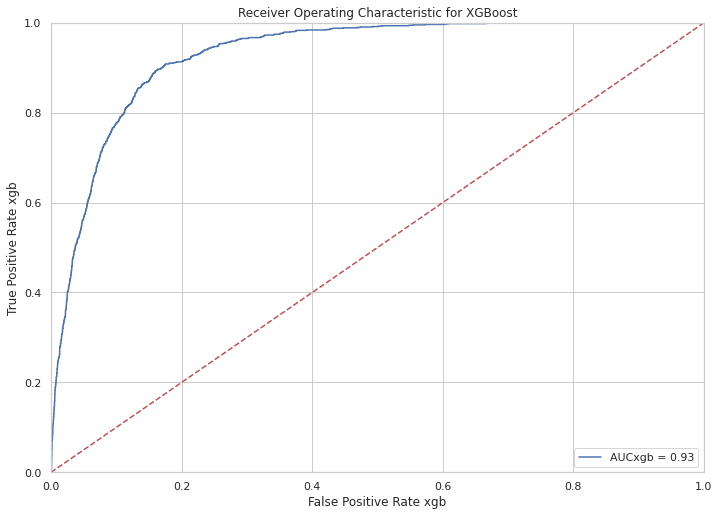

In [153]:
probxgb = xgb.predict_proba(X_test)
predsxgb = probxgb[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, predsxgb)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)


plt.title('Receiver Operating Characteristic for XGBoost')
plt.plot(fprxgb, tprxgb, 'b', label = 'AUCxgb = %0.2f' % roc_aucxgb)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate xgb')
plt.xlabel('False Positive Rate xgb')
plt.show()